In [ ]:
!pip install pandas scikit-learn


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Definindo as categorias
categories = ["NM", "HP - Cuidado", "HN - Prejudicial", "FP - Justiça",
              "FN - Injustiça", "LP - Lealdade", "LN - Traição",
              "AP - Autoridade", "AN - Subversão", "PP - Pureza", "PN - Depravação"]

# Função para consolidar rótulos de cada anotador
def consolidate_labels(row, annotator_prefix):
    labels = []
    # Iterando sobre as colunas que correspondem ao prefixo do anotador
    for col in row.index:
        if col.startswith(annotator_prefix):  # Verifica se o nome da coluna começa com o prefixo
            label = row[col]
            if pd.notnull(label) and label in categories:  # Verifica se o rótulo é válido
                labels.append(label)
    return labels

# Lendo o arquivo
df = pd.read_csv("/content/dados-kappa-twitter.csv")

# Consolidando rótulos para cada anotador, pegando todos os Labels1, Label2, Label3 etc.
df['labels_annotator1'] = df.apply(lambda row: consolidate_labels(row, "Label1_annotator1"), axis=1)
df['labels_annotator1'] += df.apply(lambda row: consolidate_labels(row, "Label2_annotator1"), axis=1)
df['labels_annotator1'] += df.apply(lambda row: consolidate_labels(row, "Label3_annotator1"), axis=1)

df['labels_annotator2'] = df.apply(lambda row: consolidate_labels(row, "Label1_annotator2"), axis=1)
df['labels_annotator2'] += df.apply(lambda row: consolidate_labels(row, "Label2_annotator2"), axis=1)
df['labels_annotator2'] += df.apply(lambda row: consolidate_labels(row, "Label3_annotator2"), axis=1)

# Binarizando as anotações com o MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transformando as anotações em matrizes binárias para ambos os anotadores
binary_matrix_annotator1 = pd.DataFrame(mlb.fit_transform(df['labels_annotator1']), columns=categories)
binary_matrix_annotator2 = pd.DataFrame(mlb.transform(df['labels_annotator2']), columns=categories)

# Resetando os índices para alinhamento correto
binary_matrix_annotator1.index = df.index
binary_matrix_annotator2.index = df.index

# Incluindo a coluna 'id' nas matrizes binárias no início
binary_matrix_annotator1['id'] = df['id']
binary_matrix_annotator2['id'] = df['id']

# Reorganizando para que o 'id' seja a primeira coluna
binary_matrix_annotator1 = binary_matrix_annotator1[['id'] + categories]
binary_matrix_annotator2 = binary_matrix_annotator2[['id'] + categories]

# Salvando as matrizes binárias com o ID no início
binary_matrix_annotator1.to_csv("binary_matrix_annotator1.csv", index=False)
binary_matrix_annotator2.to_csv("binary_matrix_annotator2.csv", index=False)

print("Matrizes binárias corrigidas e salvas com o ID do comentário no início!")


Matrizes binárias corrigidas e salvas com o ID do comentário no início!


In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Carregar as matrizes binárias dos anotadores
binary_matrix_annotator1 = pd.read_csv("/content/binary_matrix_annotator1.csv")
binary_matrix_annotator2 = pd.read_csv("/content/binary_matrix_annotator2.csv")

# Remover a coluna 'id' para calcular o Kappa apenas sobre as categorias
binary_matrix_annotator1 = binary_matrix_annotator1.drop('id', axis=1)
binary_matrix_annotator2 = binary_matrix_annotator2.drop('id', axis=1)

# Calcular o Cohen's Kappa entre os anotadores para cada categoria
kappa_scores = []
for category in binary_matrix_annotator1.columns:
    kappa = cohen_kappa_score(binary_matrix_annotator1[category], binary_matrix_annotator2[category])
    kappa_scores.append((category, kappa))

# Exibir os resultados
for category, kappa in kappa_scores:
    print(f"Kappa para a categoria '{category}': {kappa}")


Kappa para a categoria 'NM': 0.8725868725868726
Kappa para a categoria 'HP - Cuidado': 0.6576439770699669
Kappa para a categoria 'HN - Prejudicial': 0.7732372053926482
Kappa para a categoria 'FP - Justiça': 0.7825312860958042
Kappa para a categoria 'FN - Injustiça': 0.7939567841999027
Kappa para a categoria 'LP - Lealdade': 0.8330393413046351
Kappa para a categoria 'LN - Traição': 0.732729704250981
Kappa para a categoria 'AP - Autoridade': 0.6459890661608837
Kappa para a categoria 'AN - Subversão': 0.7533107004949854
Kappa para a categoria 'PP - Pureza': 0.7046392453856968
Kappa para a categoria 'PN - Depravação': 0.8380998545807077


In [ ]:
#Kappa Médio
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import numpy as np

# Carregar as matrizes binárias dos anotadores
binary_matrix_annotator1 = pd.read_csv("/content/binary_matrix_annotator1.csv")
binary_matrix_annotator2 = pd.read_csv("/content/binary_matrix_annotator2.csv")

# Remover a coluna 'id'
binary_matrix_annotator1 = binary_matrix_annotator1.drop('id', axis=1)
binary_matrix_annotator2 = binary_matrix_annotator2.drop('id', axis=1)

# Calcular o Cohen's Kappa para cada categoria
kappa_scores = [
    cohen_kappa_score(binary_matrix_annotator1[category], binary_matrix_annotator2[category])
    for category in binary_matrix_annotator1.columns
]

# Média dos Kappa individuais
average_kappa = np.mean(kappa_scores)

print(f"Kappa médio: {average_kappa}")



Kappa médio: 0.7625240034111894


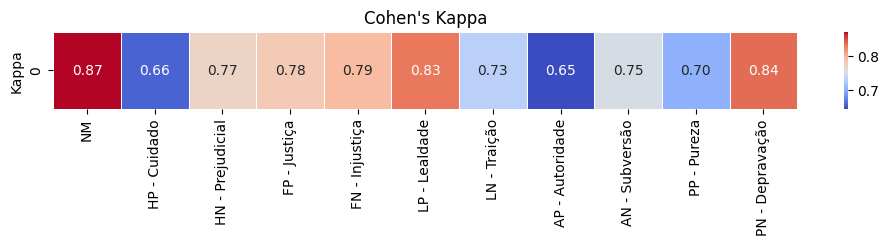

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

# Carregar as matrizes binárias dos anotadores
binary_matrix_annotator1 = pd.read_csv("/content/binary_matrix_annotator1.csv")
binary_matrix_annotator2 = pd.read_csv("/content/binary_matrix_annotator2.csv")

# Remover a coluna 'id' para calcular o Kappa apenas sobre as categorias
binary_matrix_annotator1 = binary_matrix_annotator1.drop('id', axis=1)
binary_matrix_annotator2 = binary_matrix_annotator2.drop('id', axis=1)

# Inicializando a tabela para armazenar os valores Kappa para cada categoria
kappa_matrix = []

# Calcular o Cohen's Kappa para cada categoria
for category in binary_matrix_annotator1.columns:
    kappa = cohen_kappa_score(binary_matrix_annotator1[category], binary_matrix_annotator2[category])
    kappa_matrix.append(kappa)

# Organizar os resultados em um DataFrame
kappa_df = pd.DataFrame([kappa_matrix], columns=binary_matrix_annotator1.columns)

# Plotando o mapa de calor
plt.figure(figsize=(12, 1))  # Ajuste o tamanho da figura
sns.heatmap(kappa_df, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5)

# Adicionando rótulos e título
plt.title("Cohen's Kappa")
plt.xlabel("")
plt.ylabel("Kappa")
plt.show()


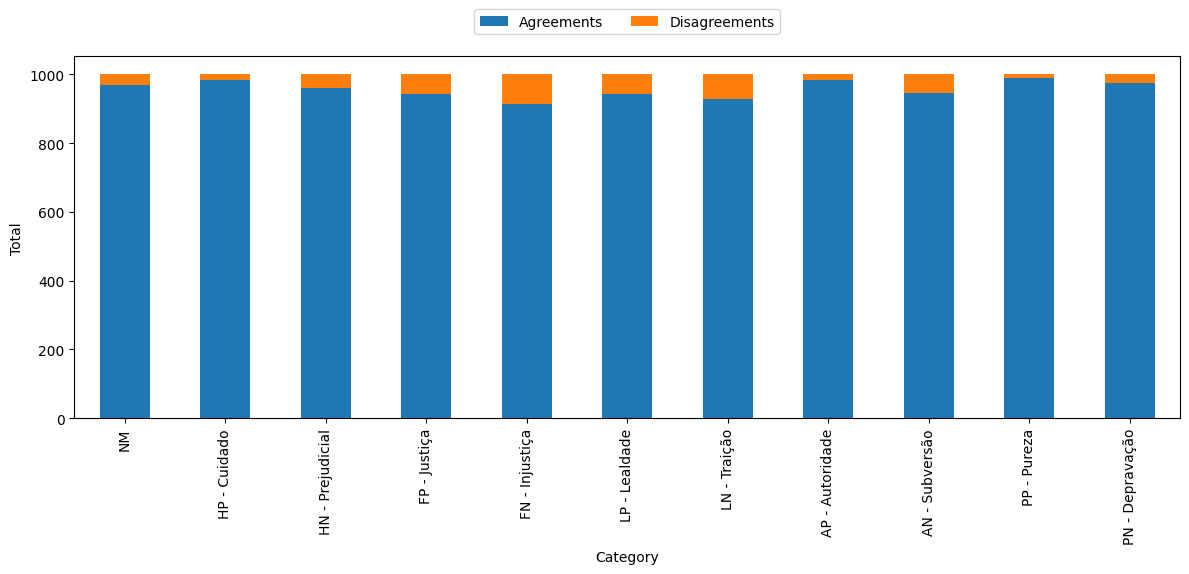

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Carregar as matrizes binárias dos anotadores
binary_matrix_annotator1 = pd.read_csv("binary_matrix_annotator1.csv")
binary_matrix_annotator2 = pd.read_csv("binary_matrix_annotator2.csv")

# Remover a coluna 'id' para calcular a matriz de confusão apenas sobre as categorias
binary_matrix_annotator1 = binary_matrix_annotator1.drop('id', axis=1)
binary_matrix_annotator2 = binary_matrix_annotator2.drop('id', axis=1)

# Inicializando listas para armazenar os valores de concordância e discordância
agreement = []
disagreement = []  # Inicializa a lista para discordância
categories = binary_matrix_annotator1.columns

# Iterar sobre todas as categorias para calcular a concordância e discordância
for category in categories:
    cm = confusion_matrix(binary_matrix_annotator1[category], binary_matrix_annotator2[category], labels=[0, 1])

    # Concordância: True Positives + True Negatives
    concordance = cm[0, 0] + cm[1, 1]

    # Discordância: False Positives + False Negatives
    disagreement_value = cm[0, 1] + cm[1, 0]  # Renomeando a variável para evitar conflito

    # Armazenar os resultados
    agreement.append(concordance)
    disagreement.append(disagreement_value)  # Agora usando a variável renomeada

# Convertendo as listas em um DataFrame para visualização
df_agreement_disagreement = pd.DataFrame({
    'Category': categories,
    'Agreements': agreement,
    'Disagreements': disagreement
})

# Plotando gráfico de barras para Concordância e Discordância por Categoria
ax = df_agreement_disagreement.set_index('Category').plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])

# Adicionando título e labels
plt.title("")
plt.xlabel("Category")
plt.ylabel("Total")
plt.xticks(rotation=90)

# Posicionando a legenda no topo (mais acima)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.tight_layout()

# Exibindo o gráfico
plt.show()



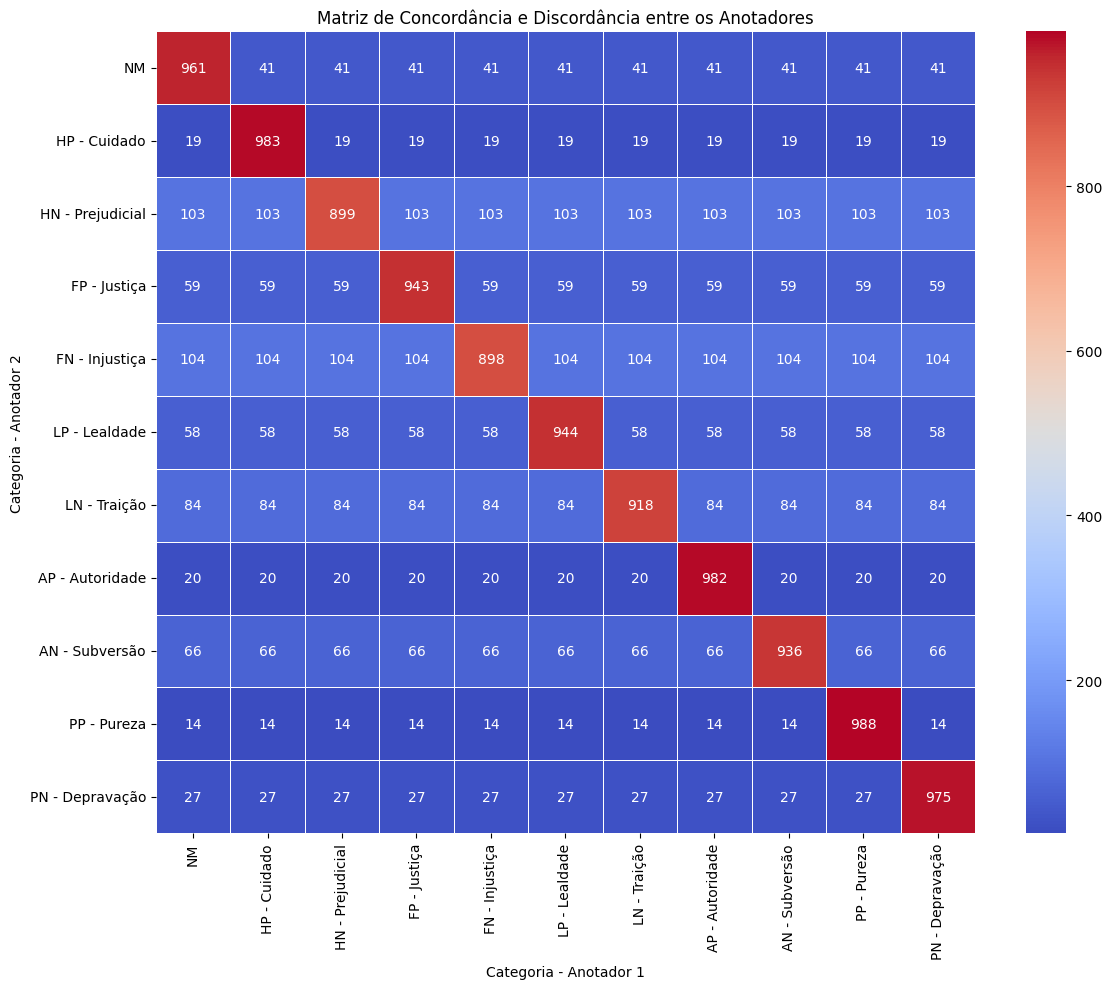

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Carregar as matrizes binárias dos anotadores
binary_matrix_annotator1 = pd.read_csv("binary_matrix_annotator1.csv")
binary_matrix_annotator2 = pd.read_csv("binary_matrix_annotator2.csv")

# Remover a coluna 'id' para calcular a matriz de confusão apenas sobre as categorias
binary_matrix_annotator1 = binary_matrix_annotator1.drop('id', axis=1)
binary_matrix_annotator2 = binary_matrix_annotator2.drop('id', axis=1)

# Inicializando uma lista para armazenar as comparações entre as categorias dos anotadores
confusion_data = []

categories = binary_matrix_annotator1.columns

# Iterando sobre todas as categorias
for category in categories:
    cm = confusion_matrix(binary_matrix_annotator1[category], binary_matrix_annotator2[category], labels=[0, 1])

    # Obtendo as comparações
    confusion_data.append(cm.flatten())  # Adiciona as 4 células da matriz de confusão

# Convertendo as comparações para DataFrame
confusion_df = pd.DataFrame(confusion_data, index=categories, columns=['TN', 'FP', 'FN', 'TP'])

# Reorganizando os dados para exibir no formato desejado (concordância e discordância)
confusion_df['Concordância'] = confusion_df['TN'] + confusion_df['TP']
confusion_df['Discordância'] = confusion_df['FP'] + confusion_df['FN']

# Agora, criamos uma matriz de concordância e discordância para os dois anotadores
final_df = pd.DataFrame(index=categories, columns=categories)

# Preenchendo a matriz final com valores numéricos
for i in range(len(categories)):
    for j in range(len(categories)):
        if i == j:
            # Quando o anotador 1 e o anotador 2 têm a mesma categoria
            final_df.iloc[i, j] = confusion_df.loc[categories[i], 'Concordância']
        else:
            # Quando os anotadores têm categorias diferentes
            final_df.iloc[i, j] = confusion_df.loc[categories[i], 'Discordância']

# Convertendo os valores da matriz para tipo inteiro (para evitar o erro de tipo)
final_df = final_df.astype(int)

# Visualizando a matriz combinada com mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(final_df, annot=True, cmap="coolwarm", cbar=True, fmt="d", linewidths=0.5,
            xticklabels=categories, yticklabels=categories)
plt.title("Matriz de Concordância e Discordância entre os Anotadores")
plt.xlabel("Categoria - Anotador 1")
plt.ylabel("Categoria - Anotador 2")
plt.tight_layout()
plt.show()




In [20]:
import pandas as pd

def csv_to_json(csv_file, json_file):
    try:
        # Carregar o arquivo CSV
        df = pd.read_csv("/content/MFTCXplain-francielle - MFTCXplain-twitter.csv")

        # Converter para JSON
        json_data = df.to_json(orient="records", force_ascii=False, indent=4)

        # Salvar em um arquivo JSON
        with open(json_file, "w", encoding="utf-8") as f:
            f.write(json_data)

        print(f"JSON salvo em: {json_file}")
    except Exception as e:
        print(f"Erro: {e}")

# Exemplo de uso
csv_to_json("seu_arquivo.csv", "resultado.json")

JSON salvo em: resultado.json
